In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2

In [426]:
# enrichment_file = "fgsea"
enrichment_file = "gprofiler"
# enrichment_file = "enrichr"

if enrichment_file == "fgsea": # Get fgsea results.
    enr = pd.read_csv("/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/fgsea.csv", index_col=0)
    enr.rename(columns={"pathway": "native", "col": "dim", "pval": "p_value"}, inplace=True)
    enr["dim"] = enr["dim"].str.replace("X", "").astype(int)
    # Actually, it should be padj instead of pval, but nothing is significant...

elif enrichment_file == "gprofiler": # Get gprofiler results. 
    enr = pd.read_csv("/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/enrichment.csv", index_col=0)
    enr["dim"] = enr["query"].str.split(" ", expand=True)[1].astype(int)

elif enrichment_file == "enrichr": # Get enrichr results. 
    enr = pd.read_csv("/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/enrichr.csv", index_col=0)
    enr.rename(columns={"path_name": "native", "adj_p_val": "p_value"}, inplace=True)

enr["name"] = enr["native"]

In [427]:
# enr = enr[enr["source"] == "GO_Molecular_Function_2021"] # Molecular function
# enr = enr[enr["source"] == "GO_Cellular_Component_2021"] # Cellular component
enr = enr[enr["source"] == "GO_Biological_Process_2021"] # Biological process
# enr = enr[enr["source"] == "KEGG_2021_Human"] # KEGG pathways
# enr = enr[enr["source"] == "Reactome_2016"] # Reactome pathways
# enr = enr[enr["source"] == "PanglaoDB_Augmented_2021"] # Cell types

In [428]:
celltypes = [
    "Monocytes",
    "B Cells",
    "T Cells",
    "NK Cells",
    "Erythroid-like And Erythroid Precursor Cells",
]
idx = enr["native"].map(lambda x: x in celltypes)
idx |= (enr["source"] != "PanglaoDB_Augmented_2021")
enr = enr[idx]


In [429]:
enr = enr[enr["p_value"] < .05]

In [430]:
enr["minlogp"] = -np.log10(enr["p_value"])

In [431]:
enr

,source,native,name,p_value,significant,description,term_size,query_size,intersection_size,effective_domain_size,precision,recall,query,parents,method,dim,minlogp
7,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),cytokine-mediated signaling pathway (GO:0019221),1.394780e-11,True,NaN,621,156,33,14937,0.211538,0.053140,bottom_mofa 12,[],mofa,12,10.855494
18,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,cellular response to cytokine stimulus (GO:007...,2.286100e-06,True,NaN,482,156,23,14937,0.147436,0.047718,bottom_mofa 12,[],mofa,12,5.640905
29,GO_Biological_Process_2021,positive regulation of cytokine production (GO...,positive regulation of cytokine production (GO...,1.104402e-05,True,NaN,335,165,19,14937,0.115152,0.056716,bottom_mofa 3,[],mofa,3,4.956873
34,GO_Biological_Process_2021,cytokine-mediated signaling pathway (GO:0019221),cytokine-mediated signaling pathway (GO:0019221),2.069753e-05,True,NaN,621,160,25,14937,0.156250,0.040258,bottom_mofa 9,[],mofa,9,4.684081
48,GO_Biological_Process_2021,regulation of smooth muscle cell proliferation...,regulation of smooth muscle cell proliferation...,7.795192e-05,True,NaN,49,156,8,14937,0.051282,0.163265,bottom_mofa 12,[],mofa,12,4.108173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,GO_Biological_Process_2021,negative regulation of apoptotic process (GO:0...,negative regulation of apoptotic process (GO:0...,4.886953e-02,True,NaN,485,164,17,14937,0.103659,0.035052,mowgli 37,[],mowgli,37,1.310962
1460,GO_Biological_Process_2021,phosphorylation (GO:0016310),phosphorylation (GO:0016310),4.915477e-02,True,NaN,400,160,15,14937,0.093750,0.037500,mowgli 48,[],mowgli,48,1.308434
1461,GO_Biological_Process_2021,Fc receptor mediated stimulatory signaling pat...,Fc receptor mediated stimulatory signaling pat...,4.937990e-02,True,NaN,74,173,7,14937,0.040462,0.094595,mowgli 0,[],mowgli,0,1.306450
1463,GO_Biological_Process_2021,positive regulation of transcription by RNA po...,positive regulation of transcription by RNA po...,4.957295e-02,True,NaN,908,167,25,14937,0.149701,0.027533,mowgli 15,[],mowgli,15,1.304755


## Is Mowgli more specific?

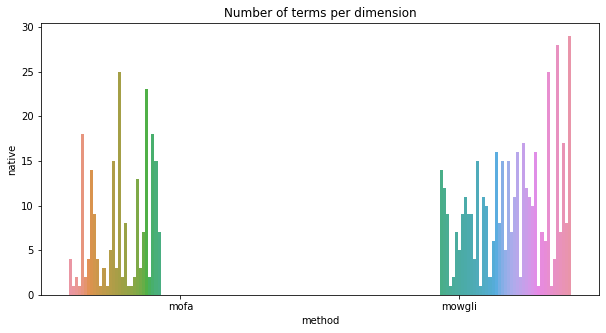

In [432]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.barplot(
    data=enr.groupby(["method", "query"])["native"].nunique().reset_index(),
    x="method",
    y="native",
    hue="query",
    ax=ax,
)
ax.set_title("Number of terms per dimension")
ax.get_legend().remove()
plt.show()
# + and - counted separately or mofa

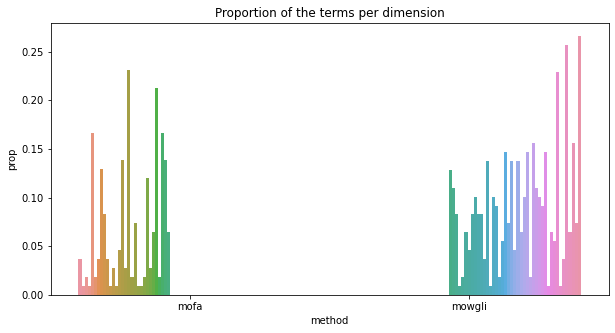

In [433]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
df = enr.groupby(["method", "query"])["native"].nunique().reset_index()
df["nterms"] = df["method"].map(enr.groupby("method")["native"].nunique())
df["prop"] = df["native"] / df["nterms"]
sns.barplot(
    data=df,
    x="method",
    y="prop",
    hue="query",
    ax=ax,
)
ax.set_title("Proportion of the terms per dimension")
ax.get_legend().remove()
plt.show()
# + and - counted separately or mofa

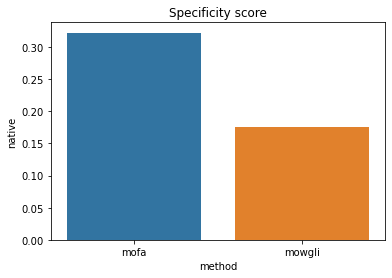

In [434]:
# specificity score
s = enr.groupby("method")["native"].nunique() # nterms
s += enr.groupby("method")["query"].nunique() # ndims
s /= 2*enr.groupby("method")["native"].count() # 2*nlinks
plt.title("Specificity score")
sns.barplot(data=pd.DataFrame(s).reset_index(), x="method", y="native")
plt.show()

## Does Mowgli find other things?

In [435]:
mofa_terms = enr.loc[enr["method"] == "mofa", "native"].unique()
mowgli_terms = enr.loc[enr["method"] == "mowgli", "native"].unique()
intersecting_terms = np.intersect1d(mofa_terms, mowgli_terms)
terms_in_mofa_only = np.setdiff1d(mofa_terms, mowgli_terms)
terms_in_mowgli_only = np.setdiff1d(mowgli_terms, mofa_terms)

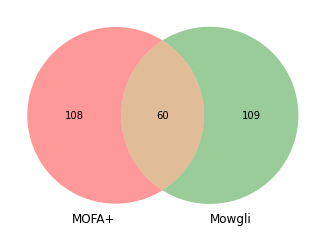

In [436]:
venn2(subsets = (len(mofa_terms), len(mowgli_terms), len(intersecting_terms)), set_labels = ('MOFA+', 'Mowgli'))
plt.show()

<AxesSubplot:xlabel='minlogp'>

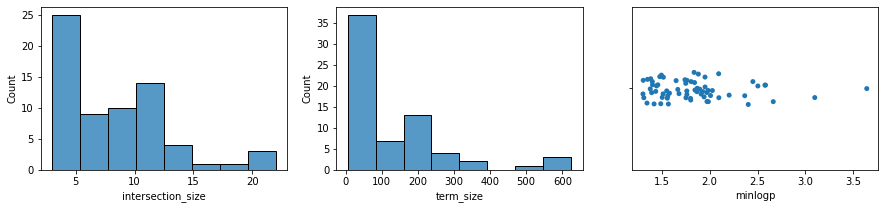

In [437]:
df = enr.set_index("native").loc[
    terms_in_mofa_only,
    ["minlogp", "term_size", "query_size", "intersection_size"],
].reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(data=df, x="intersection_size", ax=axes[0])
sns.histplot(data=df, x="term_size", ax=axes[1])
sns.stripplot(data=df, x="minlogp", ax=axes[2])


<AxesSubplot:xlabel='minlogp'>

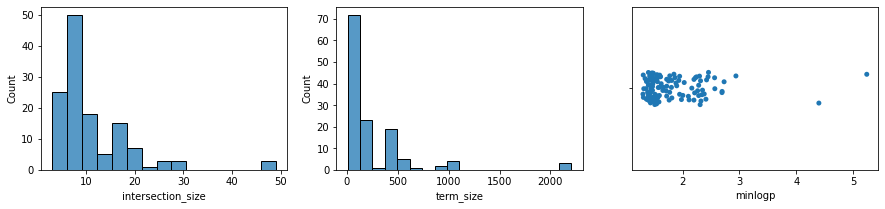

In [438]:
df = enr.set_index("native").loc[
    terms_in_mowgli_only,
    ["minlogp", "term_size", "query_size", "intersection_size"],
].reset_index()
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.histplot(data=df, x="intersection_size", ax=axes[0])
sns.histplot(data=df, x="term_size", ax=axes[1])
sns.stripplot(data=df, x="minlogp", ax=axes[2])


## Count enrichments

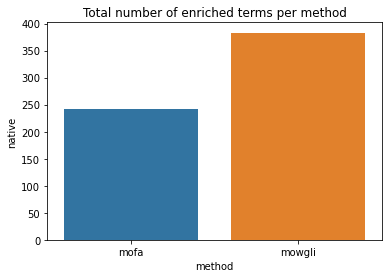

In [321]:
plt.title("Total number of enriched terms per method")
sns.barplot(data=enr.groupby("method").count().reset_index(), x="method", y="native")
plt.show()

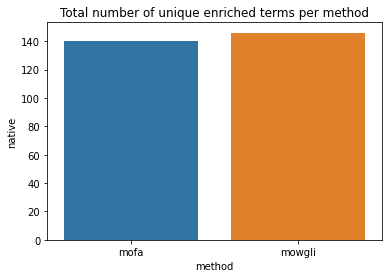

In [322]:
plt.title("Total number of unique enriched terms per method")
sns.barplot(data=enr.groupby("method")["native"].nunique().reset_index(), x="method", y="native")
plt.show()

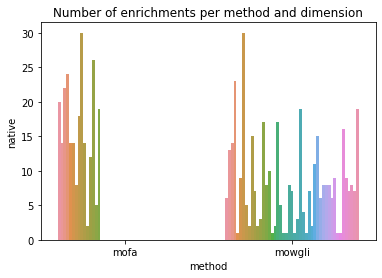

In [323]:
fig, ax = plt.subplots(1, 1)
sns.barplot(data=enr.groupby(["method", "dim"])["native"].count().reset_index(), x="method", y="native", hue="dim", ax=ax)
ax.get_legend().remove()
ax.set_title("Number of enrichments per method and dimension")
plt.show()

## Check specificity

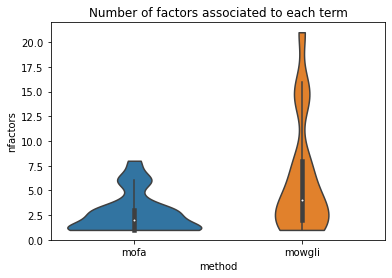

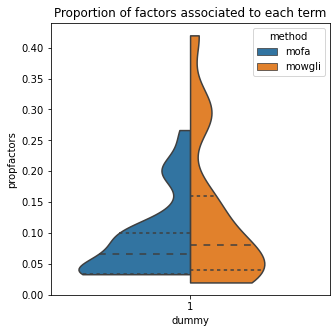

In [324]:
enr["nfactors"] = 0
nfactors = enr.groupby(["native", "method"])["native"].count()
enr.set_index(["native", "method"], inplace=True)
enr.loc[nfactors.index, "nfactors"] = nfactors
enr.reset_index(inplace=True)

plt.title("Number of factors associated to each term")
sns.violinplot(data=enr, x="method", y="nfactors", cut=0)
plt.show()

enr["ndim"] = 0
enr.loc[enr["method"] == "mofa", "ndim"] = 30
enr.loc[enr["method"] == "mowgli", "ndim"] = 50
enr["propfactors"] = enr["nfactors"] / enr["ndim"]
enr["dummy"] = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("Proportion of factors associated to each term")
sns.violinplot(
    data=enr,
    x="dummy",
    hue="method",
    y="propfactors",
    split=True,
    ax=ax,
    inner="quart",
    cut=0,
)
plt.show()


In [325]:
selectivity_mofa = (enr[enr["method"] == "mofa"]["native"].nunique() + 30) / (2*enr[enr["method"] == "mofa"]["native"].count())
selectivity_mowgli = (enr[enr["method"] == "mowgli"]["native"].nunique() + 50) / (2*enr[enr["method"] == "mowgli"]["native"].count())
print("Selectivity of MOFA+: {:.4f}".format(selectivity_mofa))
print("Selectivity of Mowgli: {:.4f}".format(selectivity_mowgli))

Selectivity of MOFA+: 0.3512
Selectivity of Mowgli: 0.2559


## Biology-driven check

In [326]:
idx_mowgli = (enr["method"] == "mofa")
idx_mowgli = (enr["query"].str.startswith("top"))
idx_mowgli &= (enr["dim"] == 6)
enr[idx_mowgli].sort_values("p_value").head(10)

,native,method,source,name,p_value,significant,description,term_size,query_size,intersection_size,...,precision,recall,query,parents,dim,minlogp,nfactors,ndim,propfactors,dummy
134,negative regulation of epithelial cell prolife...,mofa,GO_Biological_Process_2021,negative regulation of epithelial cell prolife...,0.000722,True,NaN,72,64,6,...,0.093750,0.083333,top_mofa 6,[],6,3.141317,3,30,0.100000,1
179,negative regulation of cell population prolife...,mofa,GO_Biological_Process_2021,negative regulation of cell population prolife...,0.009115,True,NaN,379,68,10,...,0.147059,0.026385,top_mofa 6,[],6,2.040224,3,30,0.100000,1
185,T cell activation (GO:0042110),mofa,GO_Biological_Process_2021,T cell activation (GO:0042110),0.011761,True,NaN,92,47,5,...,0.106383,0.054348,top_mofa 6,[],6,1.929547,1,30,0.033333,1
219,regulation of cell migration (GO:0030334),mofa,GO_Biological_Process_2021,regulation of cell migration (GO:0030334),0.037003,True,NaN,408,74,10,...,0.135135,0.024510,top_mofa 6,[],6,1.431759,8,30,0.266667,1
227,negative regulation of response to external st...,mofa,GO_Biological_Process_2021,negative regulation of response to external st...,0.040924,True,NaN,118,78,6,...,0.076923,0.050847,top_mofa 6,[],6,1.388018,2,30,0.066667,1
237,regulation of GTPase activity (GO:0043087),mofa,GO_Biological_Process_2021,regulation of GTPase activity (GO:0043087),0.048407,True,NaN,189,74,7,...,0.094595,0.037037,top_mofa 6,[],6,1.315091,1,30,0.033333,1
241,regulation of immune response (GO:0050776),mofa,GO_Biological_Process_2021,regulation of immune response (GO:0050776),0.049744,True,NaN,179,17,4,...,0.235294,0.022346,top_mofa 6,[],6,1.303262,3,30,0.100000,1


In [327]:
idx_mofa = (enr["method"] == "mofa")
idx_mofa &= (enr["dim"] == 0)
idx_mowgli = (enr["method"] == "mowgli")
idx_mowgli &= (enr["dim"] == 33)
pd.concat((enr[idx_mofa].sort_values("p_value").head(10), enr[idx_mowgli].sort_values("p_value").head(10)))

,native,method,source,name,p_value,significant,description,term_size,query_size,intersection_size,...,precision,recall,query,parents,dim,minlogp,nfactors,ndim,propfactors,dummy
115,regulation of B cell proliferation (GO:0030888),mofa,GO_Biological_Process_2021,regulation of B cell proliferation (GO:0030888),0.000018,True,NaN,46,56,6,...,0.107143,0.130435,top_mofa 0,[],0,4.738494,1,30,0.033333,1
116,antigen receptor-mediated signaling pathway (G...,mofa,GO_Biological_Process_2021,antigen receptor-mediated signaling pathway (G...,0.000019,True,NaN,185,72,10,...,0.138889,0.054054,top_mofa 0,[],0,4.719808,6,30,0.200000,1
119,B cell activation (GO:0042113),mofa,GO_Biological_Process_2021,B cell activation (GO:0042113),0.000206,True,NaN,85,74,7,...,0.094595,0.082353,top_mofa 0,[],0,3.685327,2,30,0.066667,1
136,interferon-gamma-mediated signaling pathway (G...,mofa,GO_Biological_Process_2021,interferon-gamma-mediated signaling pathway (G...,0.000770,True,NaN,68,70,6,...,0.085714,0.088235,top_mofa 0,[],0,3.113780,3,30,0.100000,1
140,regulation of B cell receptor signaling pathwa...,mofa,GO_Biological_Process_2021,regulation of B cell receptor signaling pathwa...,0.001544,True,NaN,23,56,4,...,0.071429,0.173913,top_mofa 0,[],0,2.811279,3,30,0.100000,1
22,"positive regulation of transcription, DNA-temp...",mofa,GO_Biological_Process_2021,"positive regulation of transcription, DNA-temp...",0.005153,True,NaN,1183,62,17,...,0.274194,0.014370,bottom_mofa 0,[],0,2.287957,6,30,0.200000,1
167,negative regulation of B cell activation (GO:0...,mofa,GO_Biological_Process_2021,negative regulation of B cell activation (GO:0...,0.006443,True,NaN,22,3,2,...,0.666667,0.090909,top_mofa 0,[],0,2.190925,3,30,0.100000,1
168,antigen processing and presentation of exogeno...,mofa,GO_Biological_Process_2021,antigen processing and presentation of exogeno...,0.006628,True,NaN,98,70,6,...,0.085714,0.061224,top_mofa 0,[],0,2.178618,1,30,0.033333,1
174,antigen processing and presentation of peptide...,mofa,GO_Biological_Process_2021,antigen processing and presentation of peptide...,0.007451,True,NaN,100,70,6,...,0.085714,0.060000,top_mofa 0,[],0,2.127784,1,30,0.033333,1
175,B cell receptor signaling pathway (GO:0050853),mofa,GO_Biological_Process_2021,B cell receptor signaling pathway (GO:0050853),0.007844,True,NaN,34,56,4,...,0.071429,0.117647,top_mofa 0,[],0,2.105482,1,30,0.033333,1


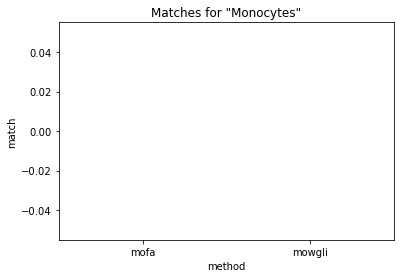

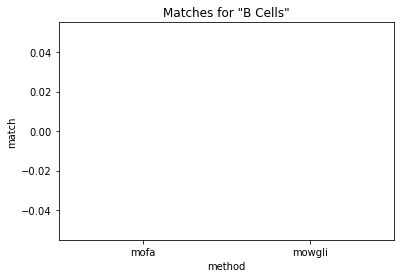

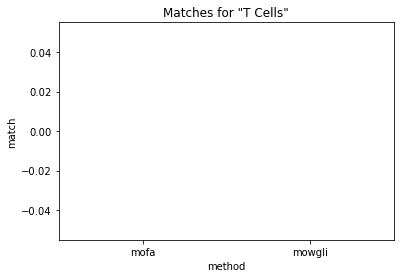

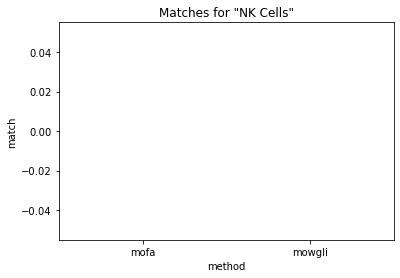

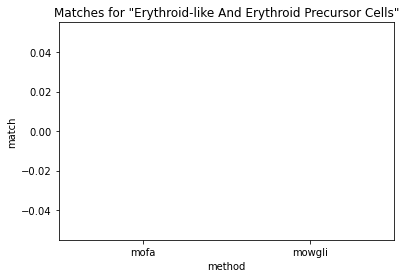

In [328]:
# TODO: check this, it seems weird
def barplot_matches(keywords, case=False):
    enr["match"] = enr["name"].str.contains(keywords, case=case)
    fig, ax = plt.subplots(1, 1)
    sns.barplot(
        data=enr.groupby(["method", "dim"])["match"].sum().reset_index(),
        x="method",
        y="match",
        hue="dim",
        ax=ax,
    )
    ax.set_title(f'Matches for "{keywords}"')
    ax.get_legend().remove()
    plt.show()

for celltype in celltypes:
    try:
        barplot_matches(celltype)
    except:
        pass

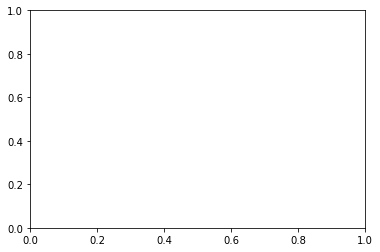

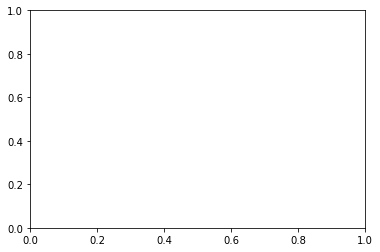

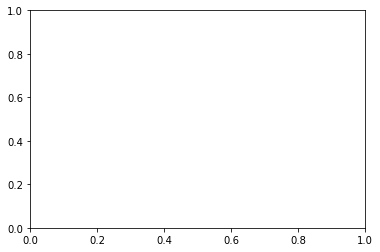

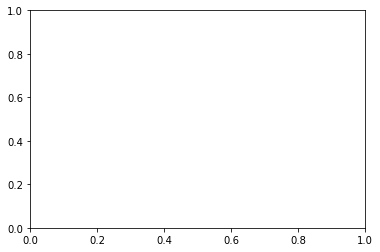

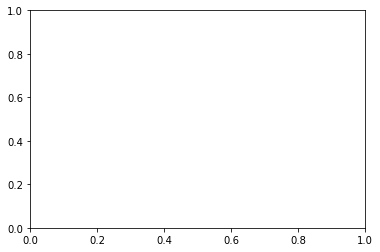

In [329]:
def stripplot_matches(keywords, case=False):
    fig, ax = plt.subplots(1, 1)
    sns.stripplot(
        data=enr[enr["name"].str.contains(keywords, case=case)],
        x="dim",
        y="minlogp",
        hue="method",
    )
    ax.set_title(f"P-values of matches for \"{keywords}\"")
    plt.show()

for celltype in celltypes:
    try:
        stripplot_matches(celltype)
    except:
        pass